In [1]:
import os
import sys
import numpy as np

myPath = os.path.dirname(os.path.abspath("../sge/sge"))
sys.path.insert(0, myPath)

from solutions import Solutions
from plotter import PlotGains

import logging
logging.getLogger().setLevel(
    logging.INFO
)  # replace INFO with CRITICAL to disable all log messages

In [2]:
level='dd'

In [3]:
if level=='di':
    solution_files = (
        "/home/users/chege/mysoftware/sge/notebooks/data/solutions_files_l246297.txt"
    )
    sample_ms = "/net/node115/data/users/lofareor/chege/NCP/redshift1/L246297/L246297_SAP000_SB224_uv_002_nxt.MS/"
    cluster_file = "/home/users/chege/theleap/leap/models/rescaled_new3c61.sky.txt.cluster"
    cluster_id = 0
    clusters_to_plot = "0,1"
    cluster_names = "'NCP','3C61.1'"

elif level == 'dd':

    solution_files = "/home/users/chege/mysoftware/sge/notebooks/data/solutions_files_dd.txt"
    sample_ms = "/net/node115/data/users/lofareor/chege/NCP/redshift1/L246297/L246297_SAP000_SB224_uv_003_nxt.MS/"
    cluster_file = "/home/users/chege/theleap/leap/models/sky_sagecal_no_diffuse_new_cluster_time_remove_outer_simple_ateam_new3c61.txt.cluster"
    cluster_id = 89
    clusters_to_plot = "1,4,24,5,13,106,10,51,96,40,84,91,30,105"
    cluster_names = "'~NCP','3C61.1','3deg','4deg','5deg','6deg','7deg','8deg','9deg','10deg','11deg','14deg','Cas-A','Cyg-A'"
else:
    raise("can only di or dd")

stations_to_plot = "0,5,10,20,40,50,55"

In [4]:
sols = Solutions(cluster_file=cluster_file, sample_ms=sample_ms, solsfiles=solution_files)

2024-07-02 14:57:12,228 - Reading /home/users/chege/mysoftware/sge/notebooks/data/solutions_files_dd.txt
2024-07-02 14:57:12,229 - Combining solutions into numpy format
2024-07-02 14:57:13,002 - Successfully read file: /net/node110/data/users/lofareor/chege/NCP/redshift1/L246297/results_nxt_t2/solutions_sagecal_mpi_dd/L246297_SAP000_SB161_uv_003_nxt.MS.solutions
2024-07-02 14:57:13,396 - Successfully read file: /net/node110/data/users/lofareor/chege/NCP/redshift1/L246297/results_nxt_t2/solutions_sagecal_mpi_dd/L246297_SAP000_SB162_uv_003_nxt.MS.solutions
2024-07-02 14:57:13,789 - Successfully read file: /net/node110/data/users/lofareor/chege/NCP/redshift1/L246297/results_nxt_t2/solutions_sagecal_mpi_dd/L246297_SAP000_SB163_uv_003_nxt.MS.solutions
2024-07-02 14:57:14,186 - Successfully read file: /net/node110/data/users/lofareor/chege/NCP/redshift1/L246297/results_nxt_t2/solutions_sagecal_mpi_dd/L246297_SAP000_SB164_uv_003_nxt.MS.solutions
2024-07-02 14:57:14,586 - Successfully read fil

/home/users/chege/mysoftware/sge/sge/plotter.py:161: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0.4)
/home/users/chege/mysoftware/sge/sge/plotter.py:162: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig2.tight_layout(pad=0.4)


(<Figure size 1200x1500 with 26 Axes>, <Figure size 1200x1500 with 26 Axes>)

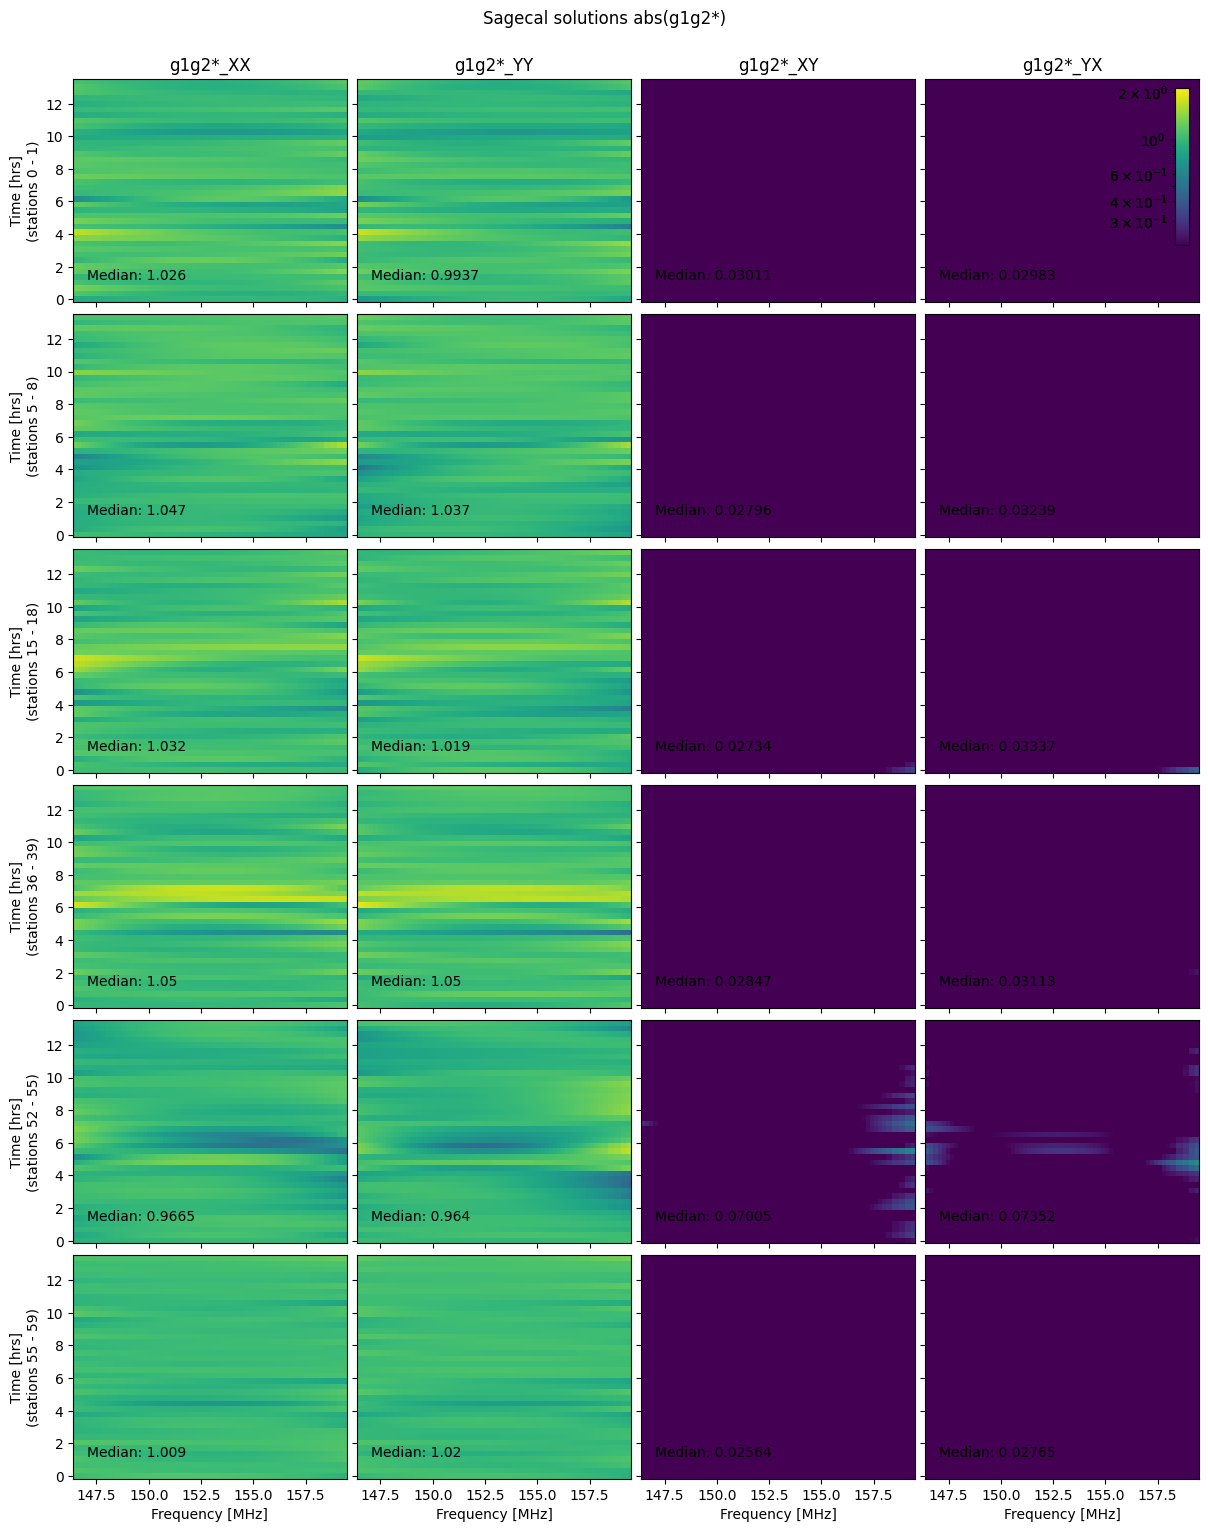

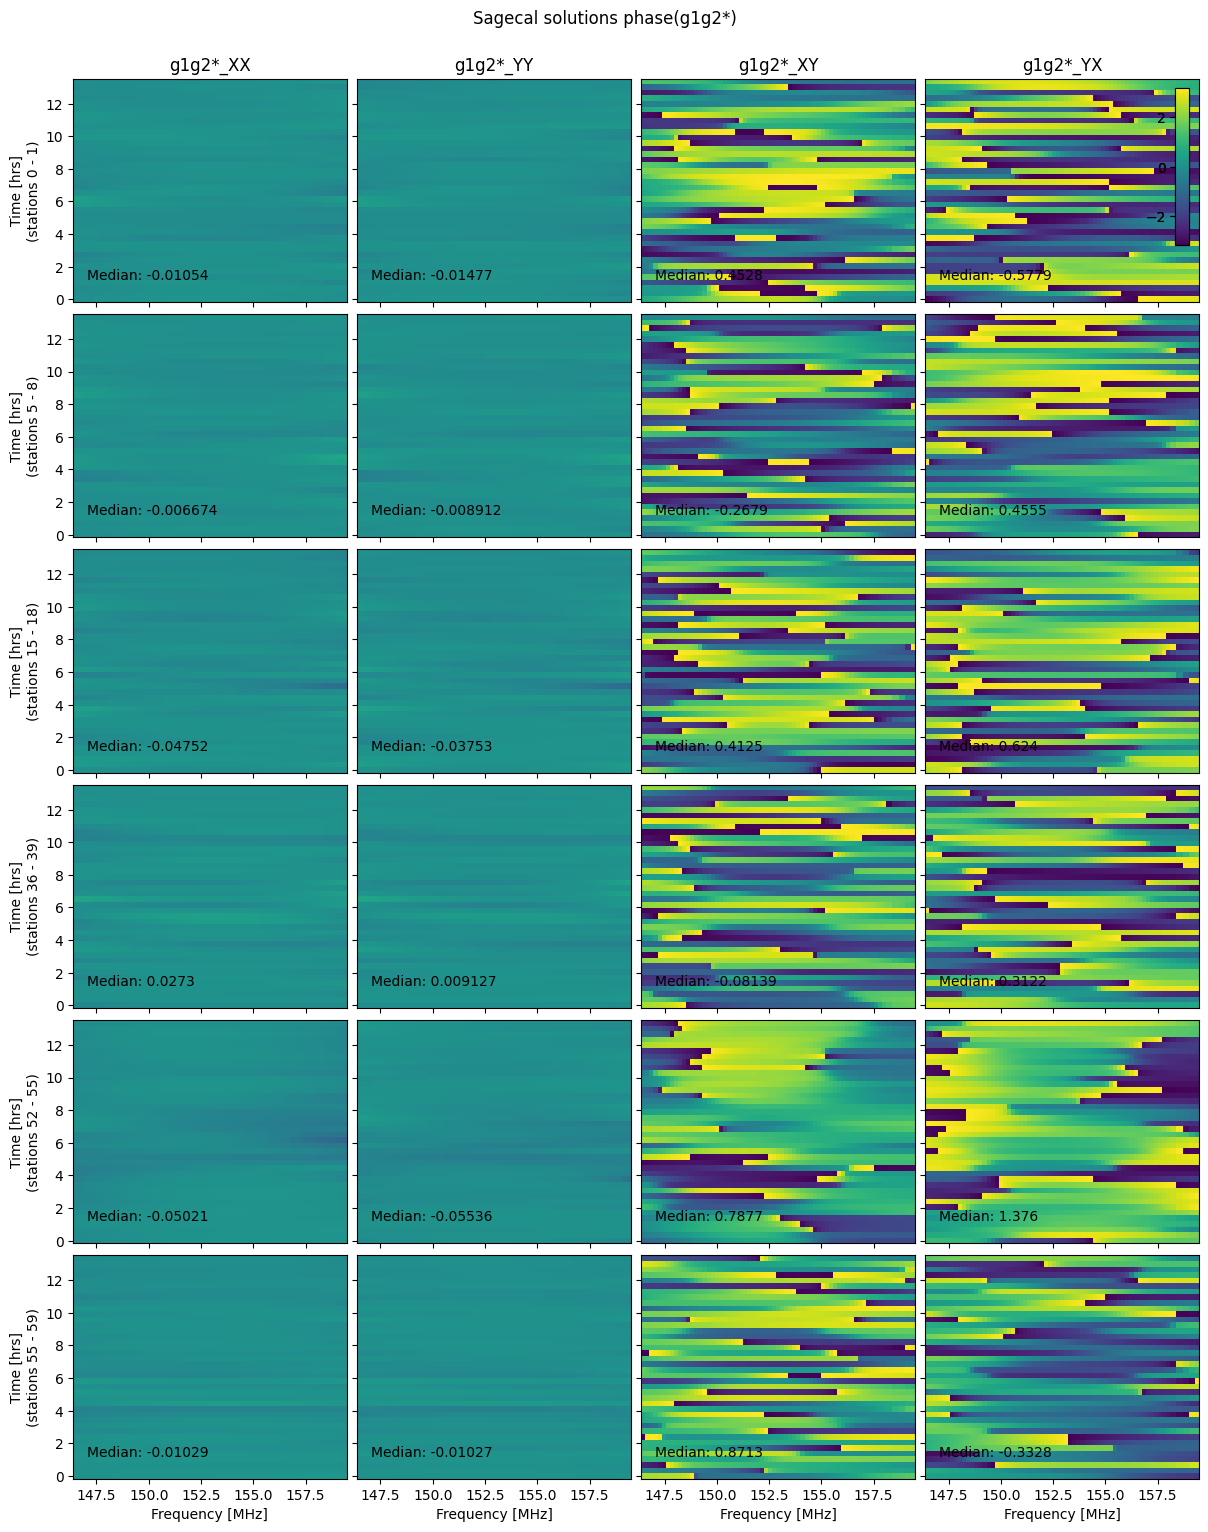

In [5]:
station_pairs = [(0, 1), (5, 8), (15, 18), (36, 39), (52, 55), (55, 59)]
sols.plot.baselines_abs_and_phase(station_pairs, cluster_id=cluster_id)

/home/users/chege/mysoftware/sge/sge/plotter.py:268: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0.4)


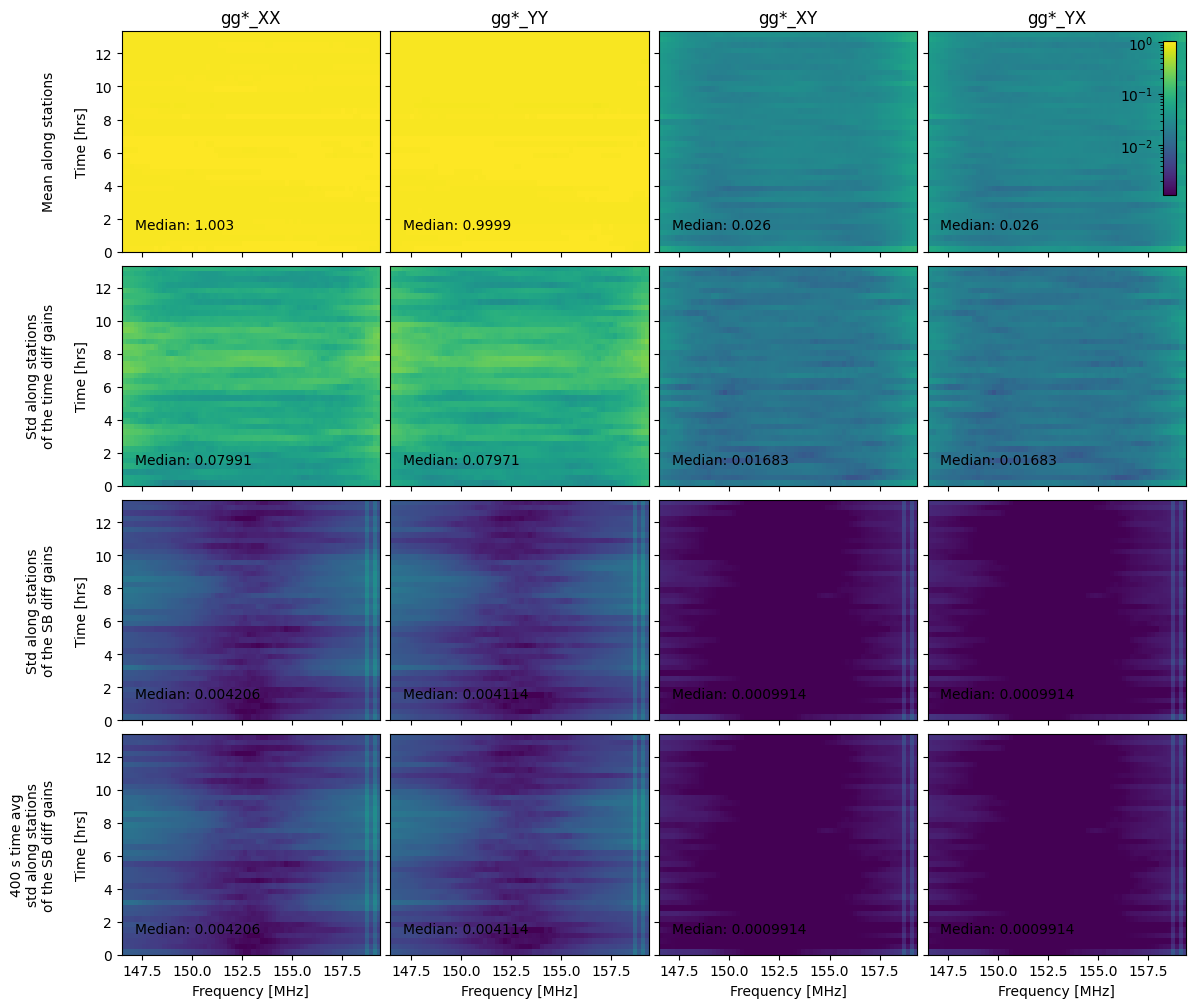

In [6]:
fig = sols.plot.mean_and_std(cluster_id=cluster_id, avg_type='stations', n_time_avg=1)
# import matplotlib.pyplot as plt
# fig.savefig("ccc.png", bbox_inches='tight')

/home/users/chege/mysoftware/sge/sge/plotter.py:268: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0.4)


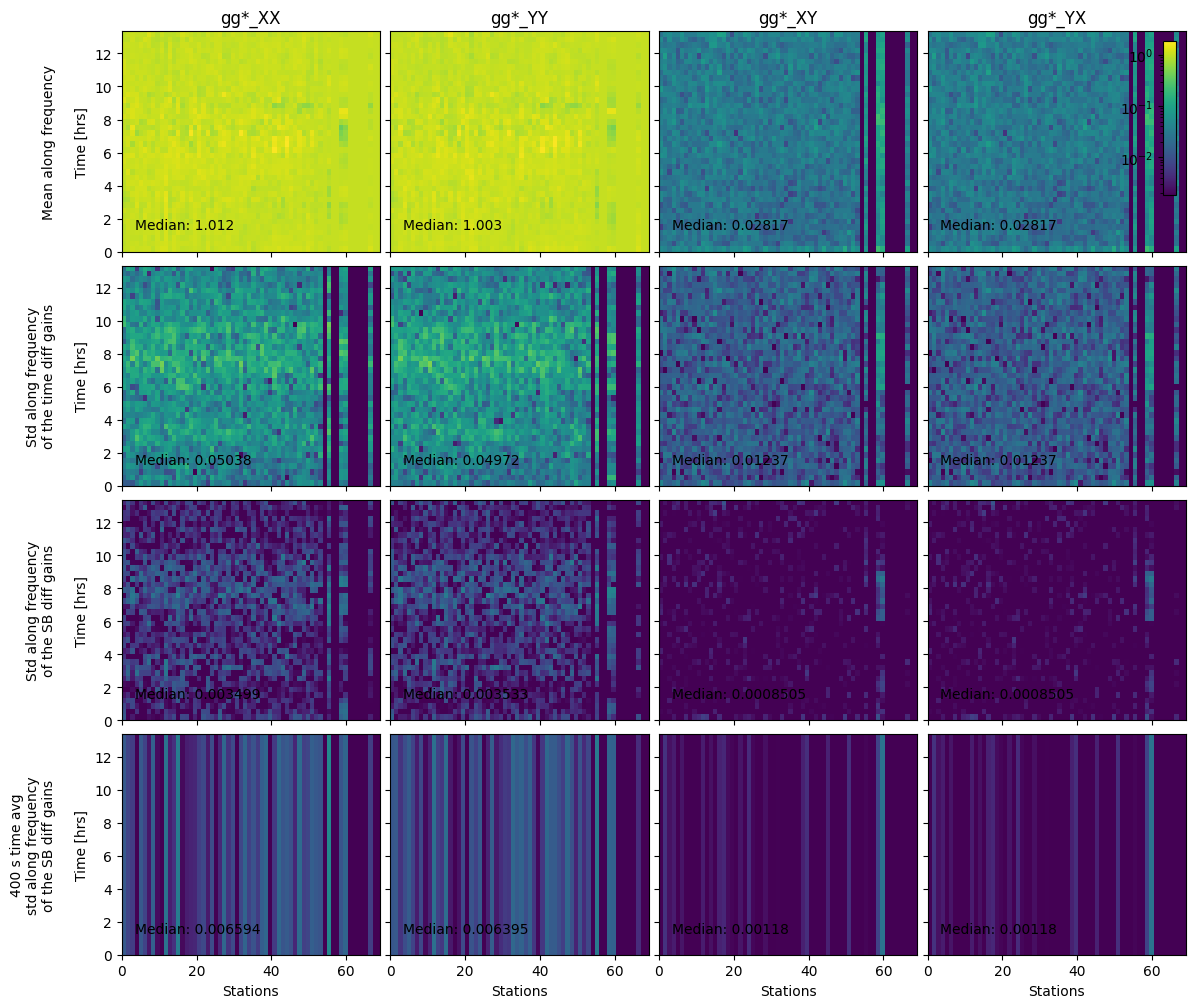

In [7]:
fig = sols.plot.mean_and_std(cluster_id=cluster_id, n_time_avg=40, avg_type="frequency")

In [8]:
solsdict = sols.make_gains_dict()

['~NCP', '3C61.1', '3deg', '4deg', '5deg', '6deg', '7deg', '8deg', '9deg', '10deg', '11deg', '14deg', 'Cas-A', 'Cyg-A'] [1, 4, 24, 5, 13, 106, 10, 51, 96, 40, 84, 91, 30, 105]
2024-07-02 14:58:12,633 - Plotting stations: ['CS001HBA0', 'CS003HBA1', 'CS006HBA0', 'CS021HBA0', 'CS301HBA0', 'RS208HBA', 'RS310HBA']
2024-07-02 14:58:12,634 - Plotting cluster IDs: [1, 4, 24, 5, 13, 106, 10, 51, 96, 40, 84, 91, 30, 105]
2024-07-02 14:58:12,635 - Plotting cluster names: ['~NCP', '3C61.1', '3deg', '4deg', '5deg', '6deg', '7deg', '8deg', '9deg', '10deg', '11deg', '14deg', 'Cas-A', 'Cyg-A']


/home/users/chege/mysoftware/sge/sge/plotter.py:355: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0.4)


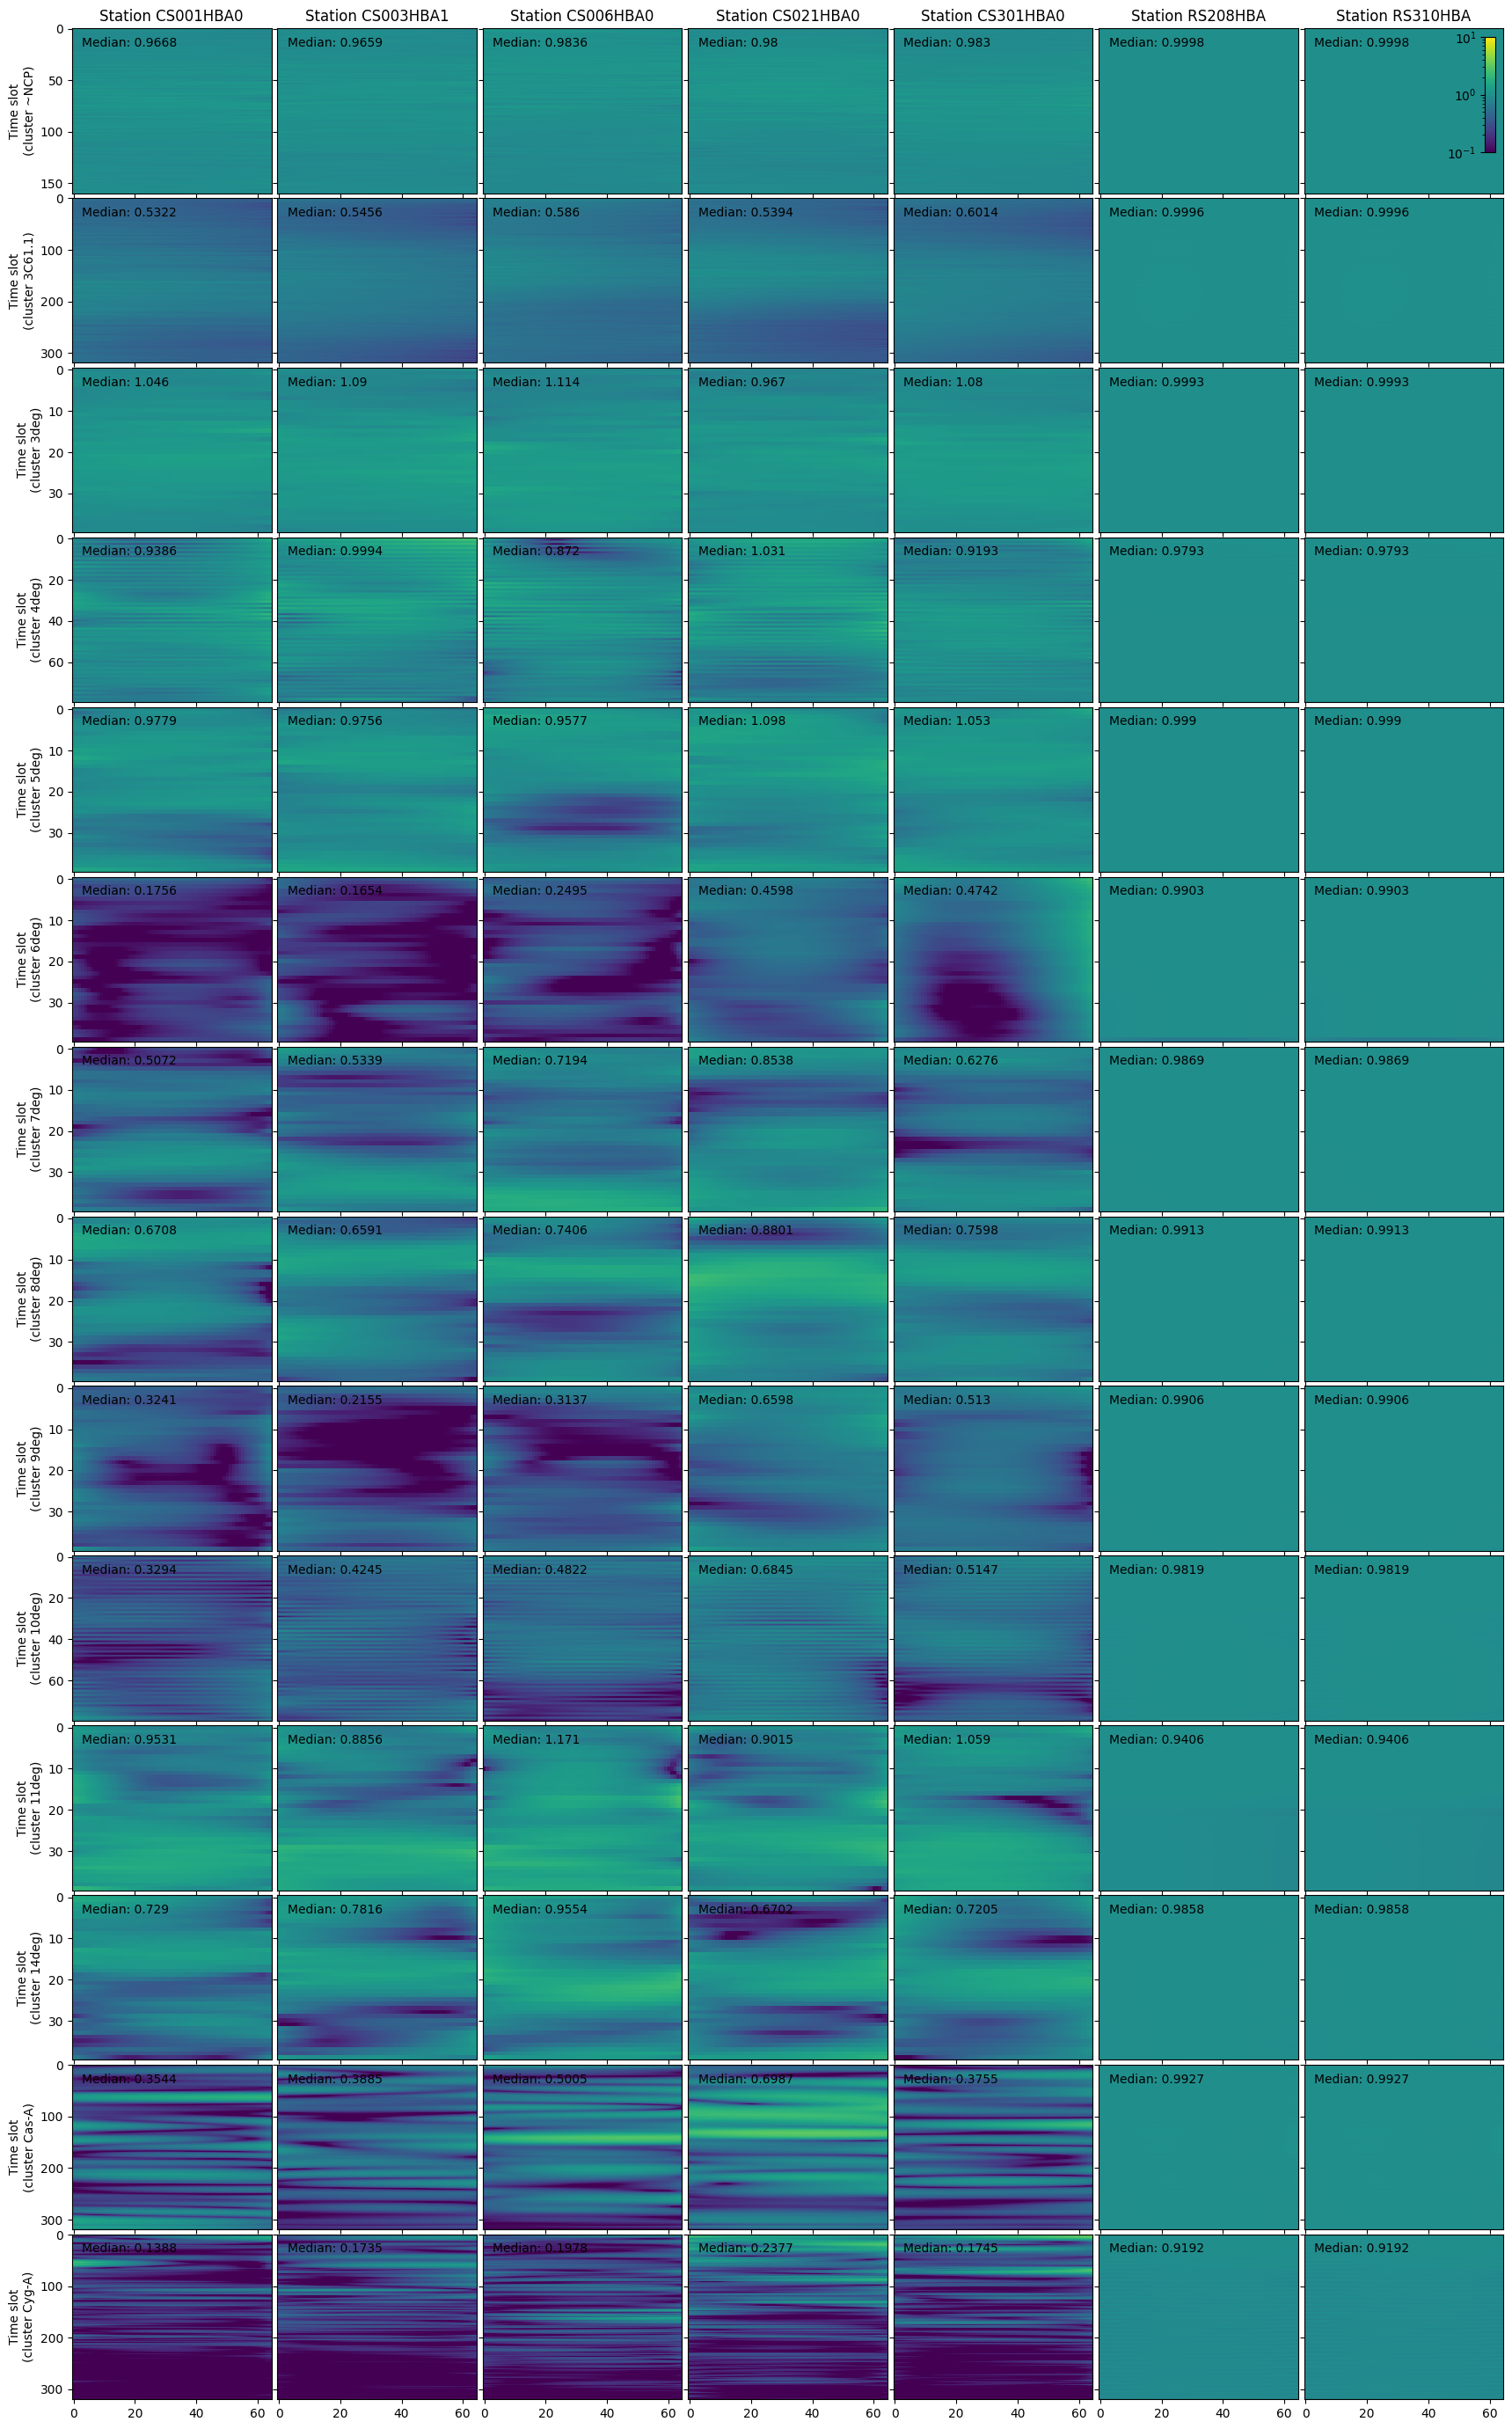

In [9]:
fig = sols.plot.dynamic_spectrum(
    gain_data=solsdict,
    dd_stations=stations_to_plot,
    dd_clusters=clusters_to_plot,
    clusters_names=cluster_names,
    vmin=0.1,
    vmax=10,
)

['~NCP', '3C61.1', '3deg', '4deg', '5deg', '6deg', '7deg', '8deg', '9deg', '10deg', '11deg', '14deg', 'Cas-A', 'Cyg-A'] [1, 4, 24, 5, 13, 106, 10, 51, 96, 40, 84, 91, 30, 105]
2024-07-02 14:58:30,124 - Plotting stations: ['CS001HBA0', 'CS003HBA1', 'CS006HBA0', 'CS021HBA0', 'CS301HBA0', 'RS208HBA', 'RS310HBA']
2024-07-02 14:58:30,125 - Plotting cluster IDs: [1, 4, 24, 5, 13, 106, 10, 51, 96, 40, 84, 91, 30, 105]
2024-07-02 14:58:30,125 - Plotting cluster names: ['~NCP', '3C61.1', '3deg', '4deg', '5deg', '6deg', '7deg', '8deg', '9deg', '10deg', '11deg', '14deg', 'Cas-A', 'Cyg-A']


/home/users/chege/mysoftware/sge/sge/plotter.py:355: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0.4)


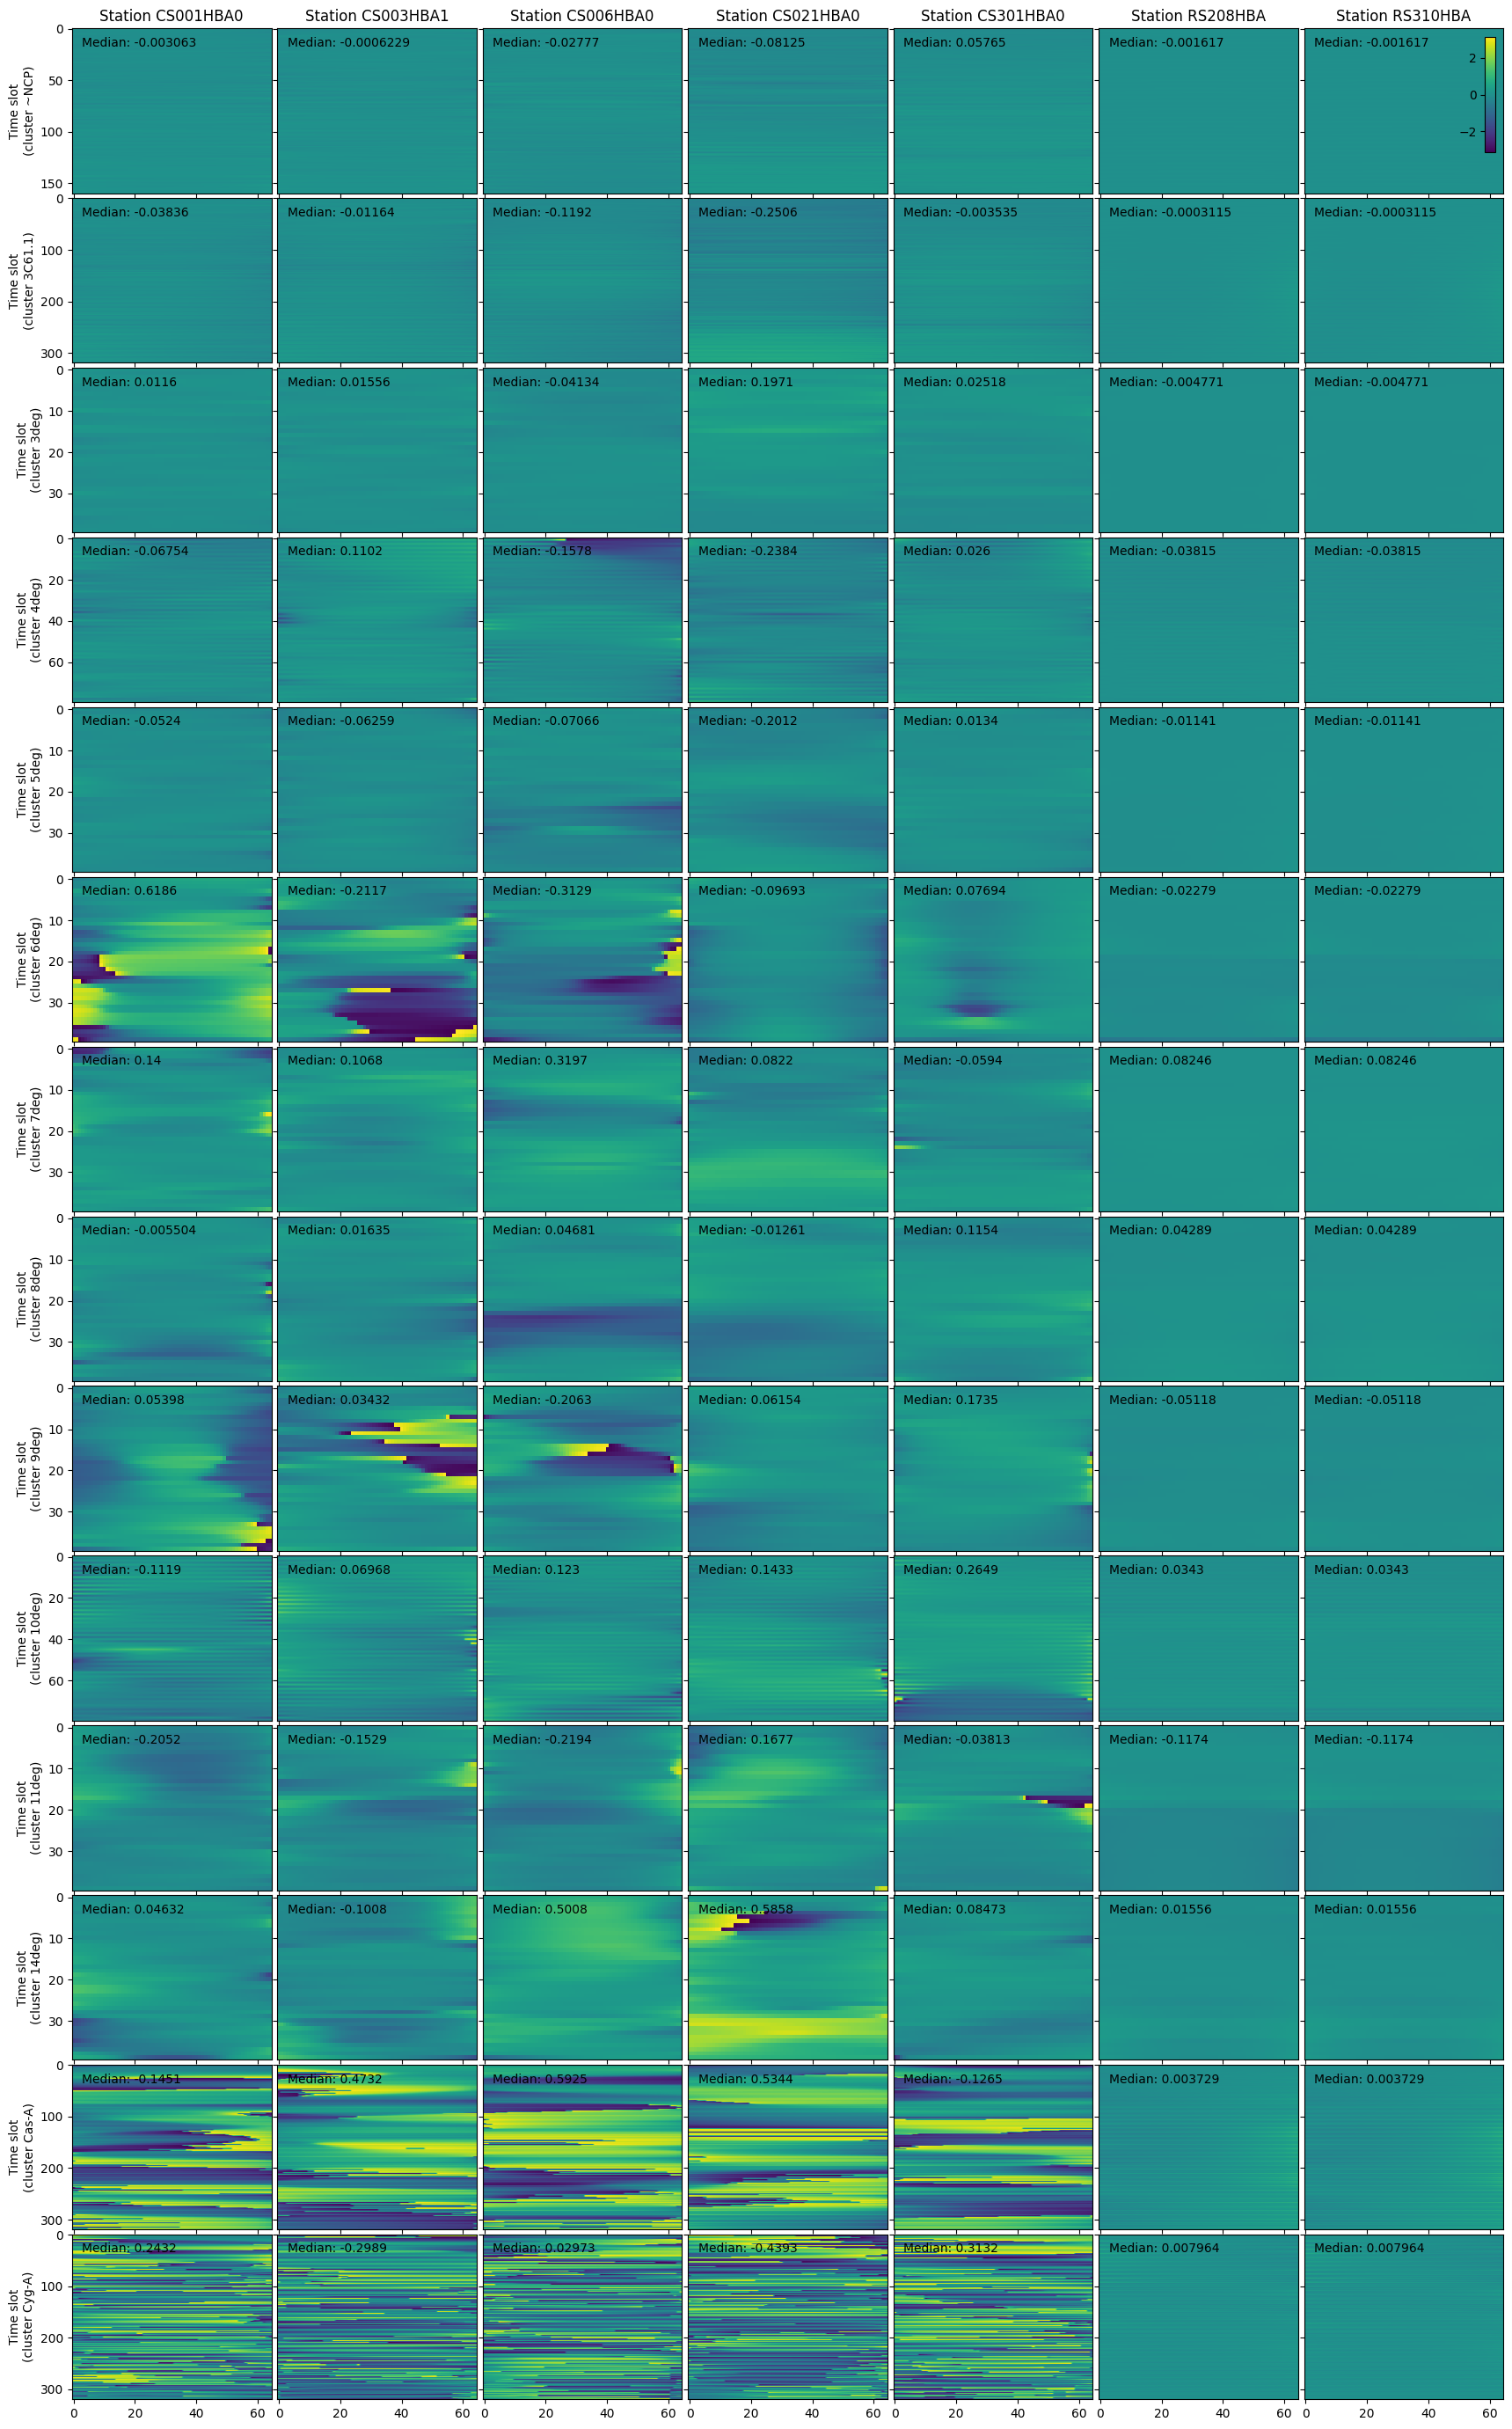

In [10]:
fig = sols.plot.dynamic_spectrum(
    gain_data=solsdict,
    dd_stations=stations_to_plot,
    dd_clusters=clusters_to_plot,
    clusters_names=cluster_names,
    action_fct=np.angle,
    log_norm=False,
    vmin=-np.pi,
    vmax=np.pi
)

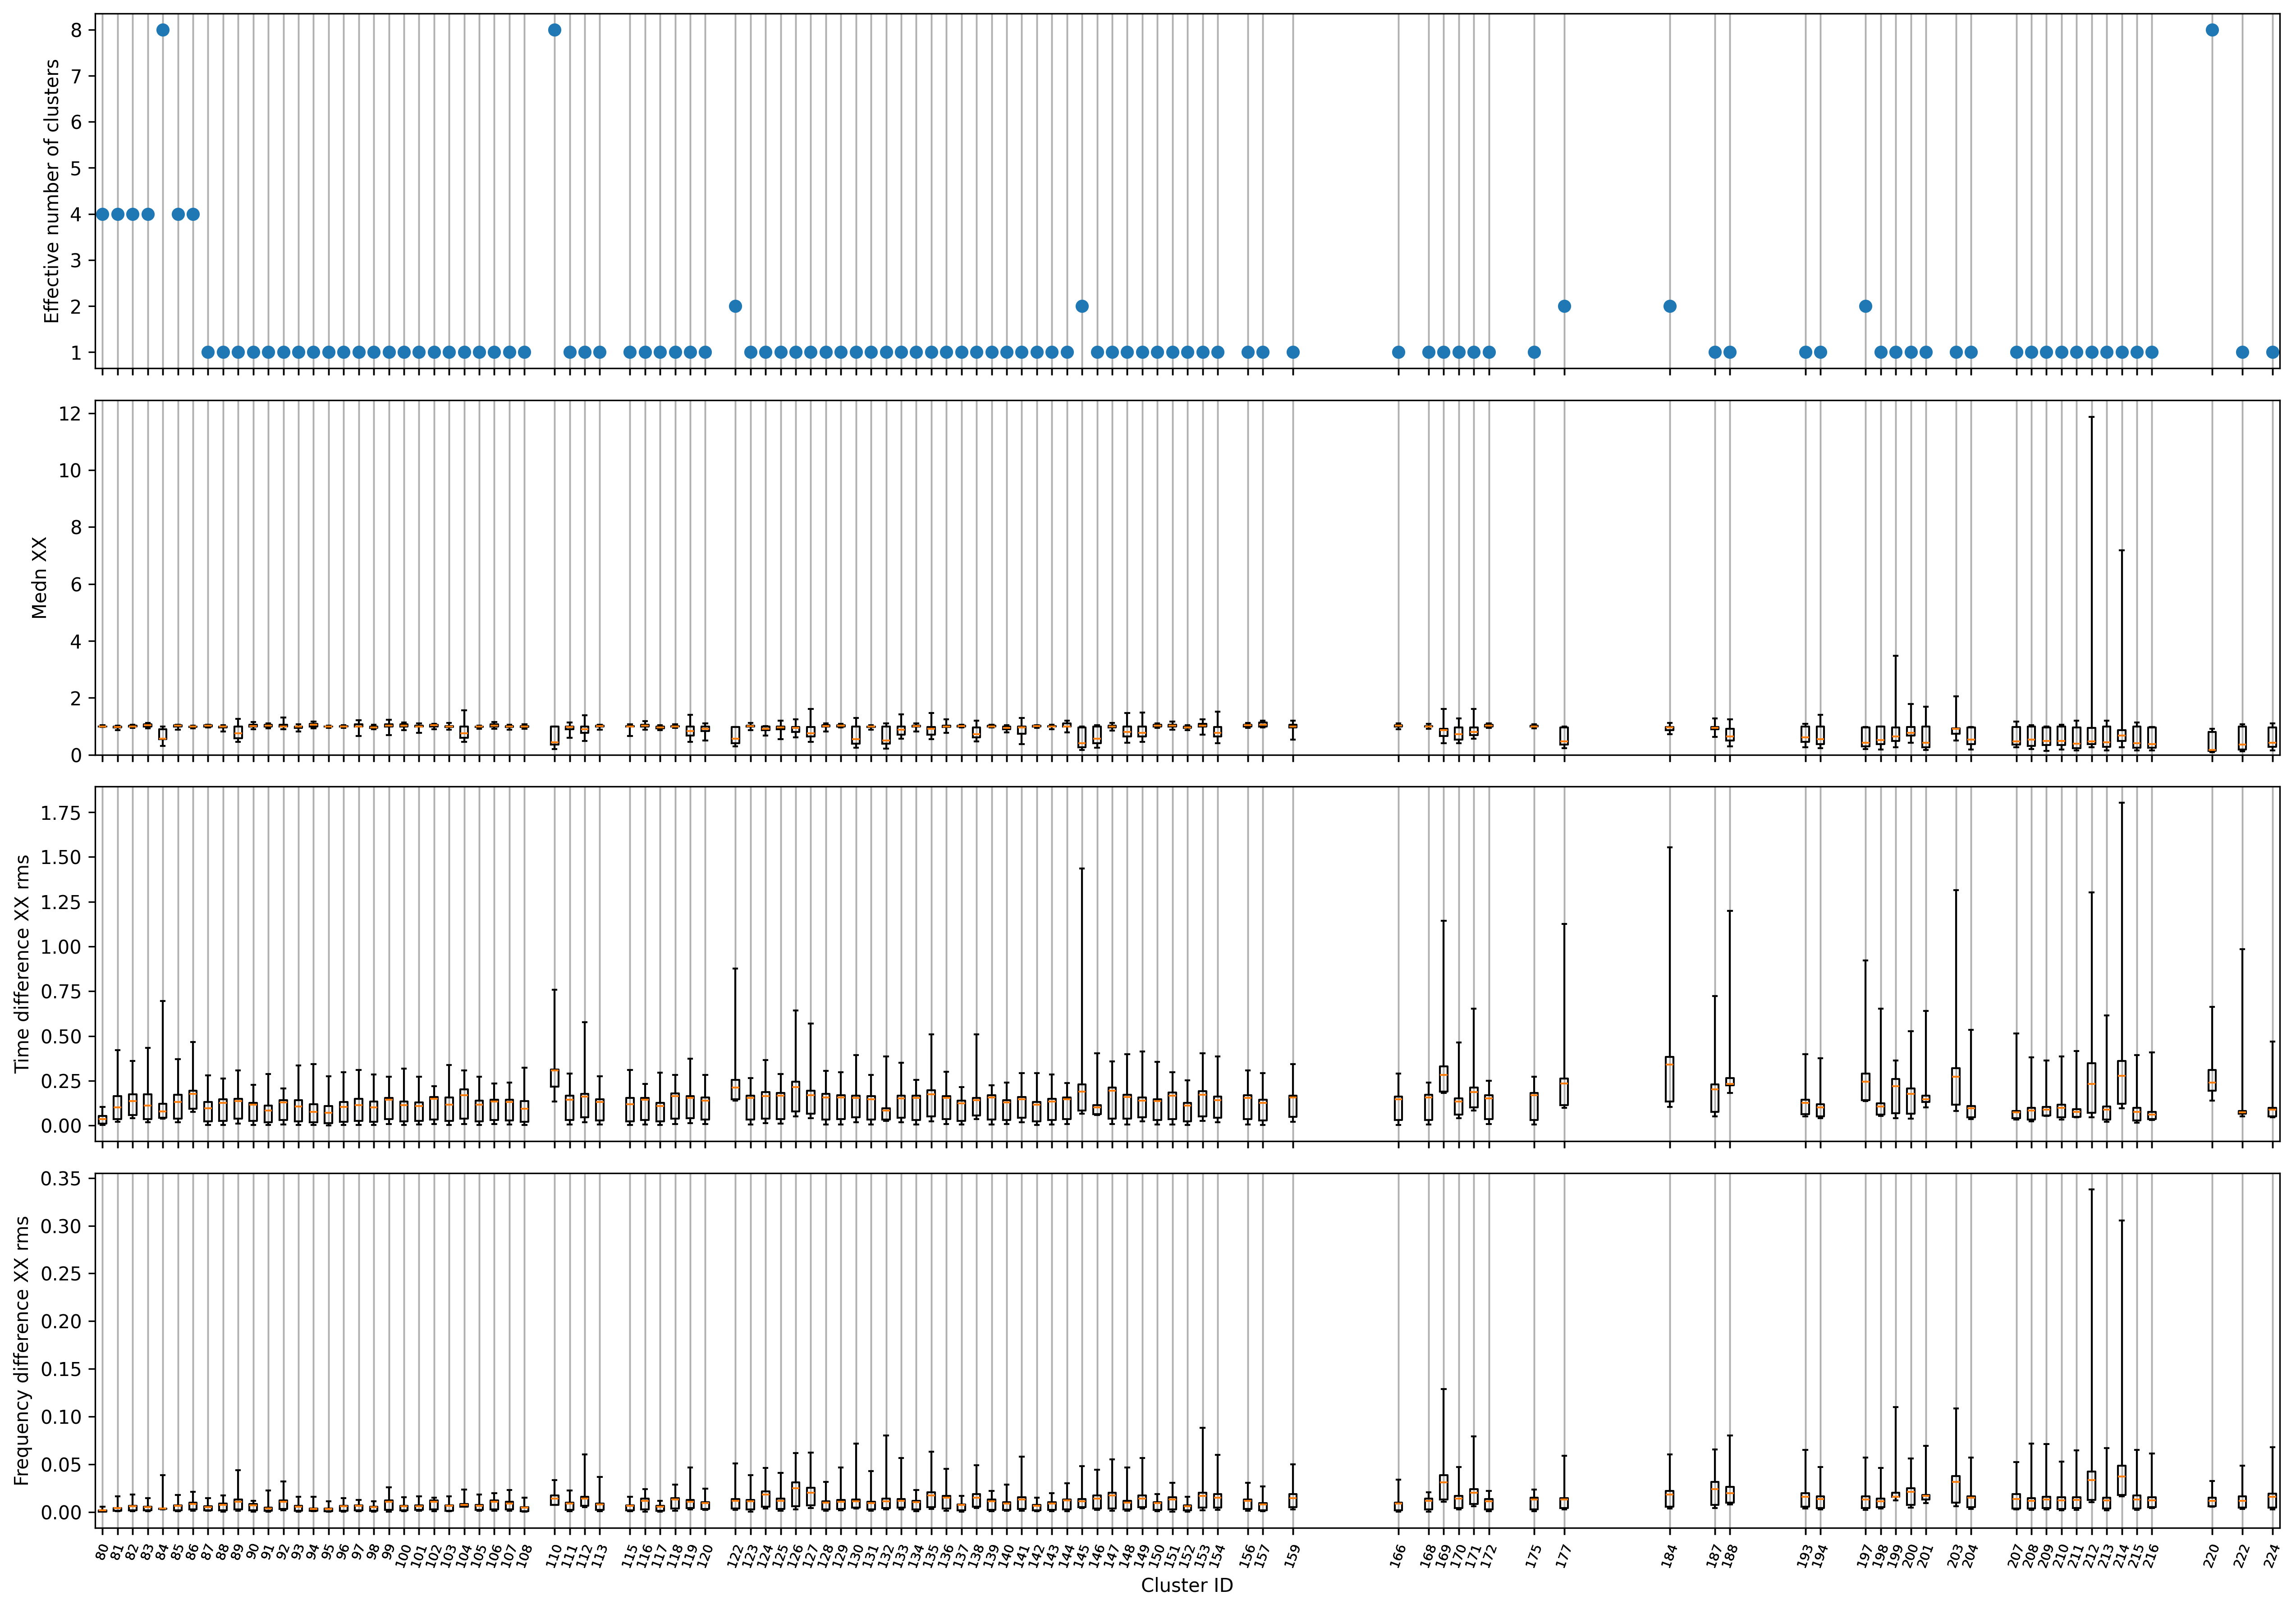

In [11]:
fig = sols.plot.cluster_stats(solsdict, pol="XX")

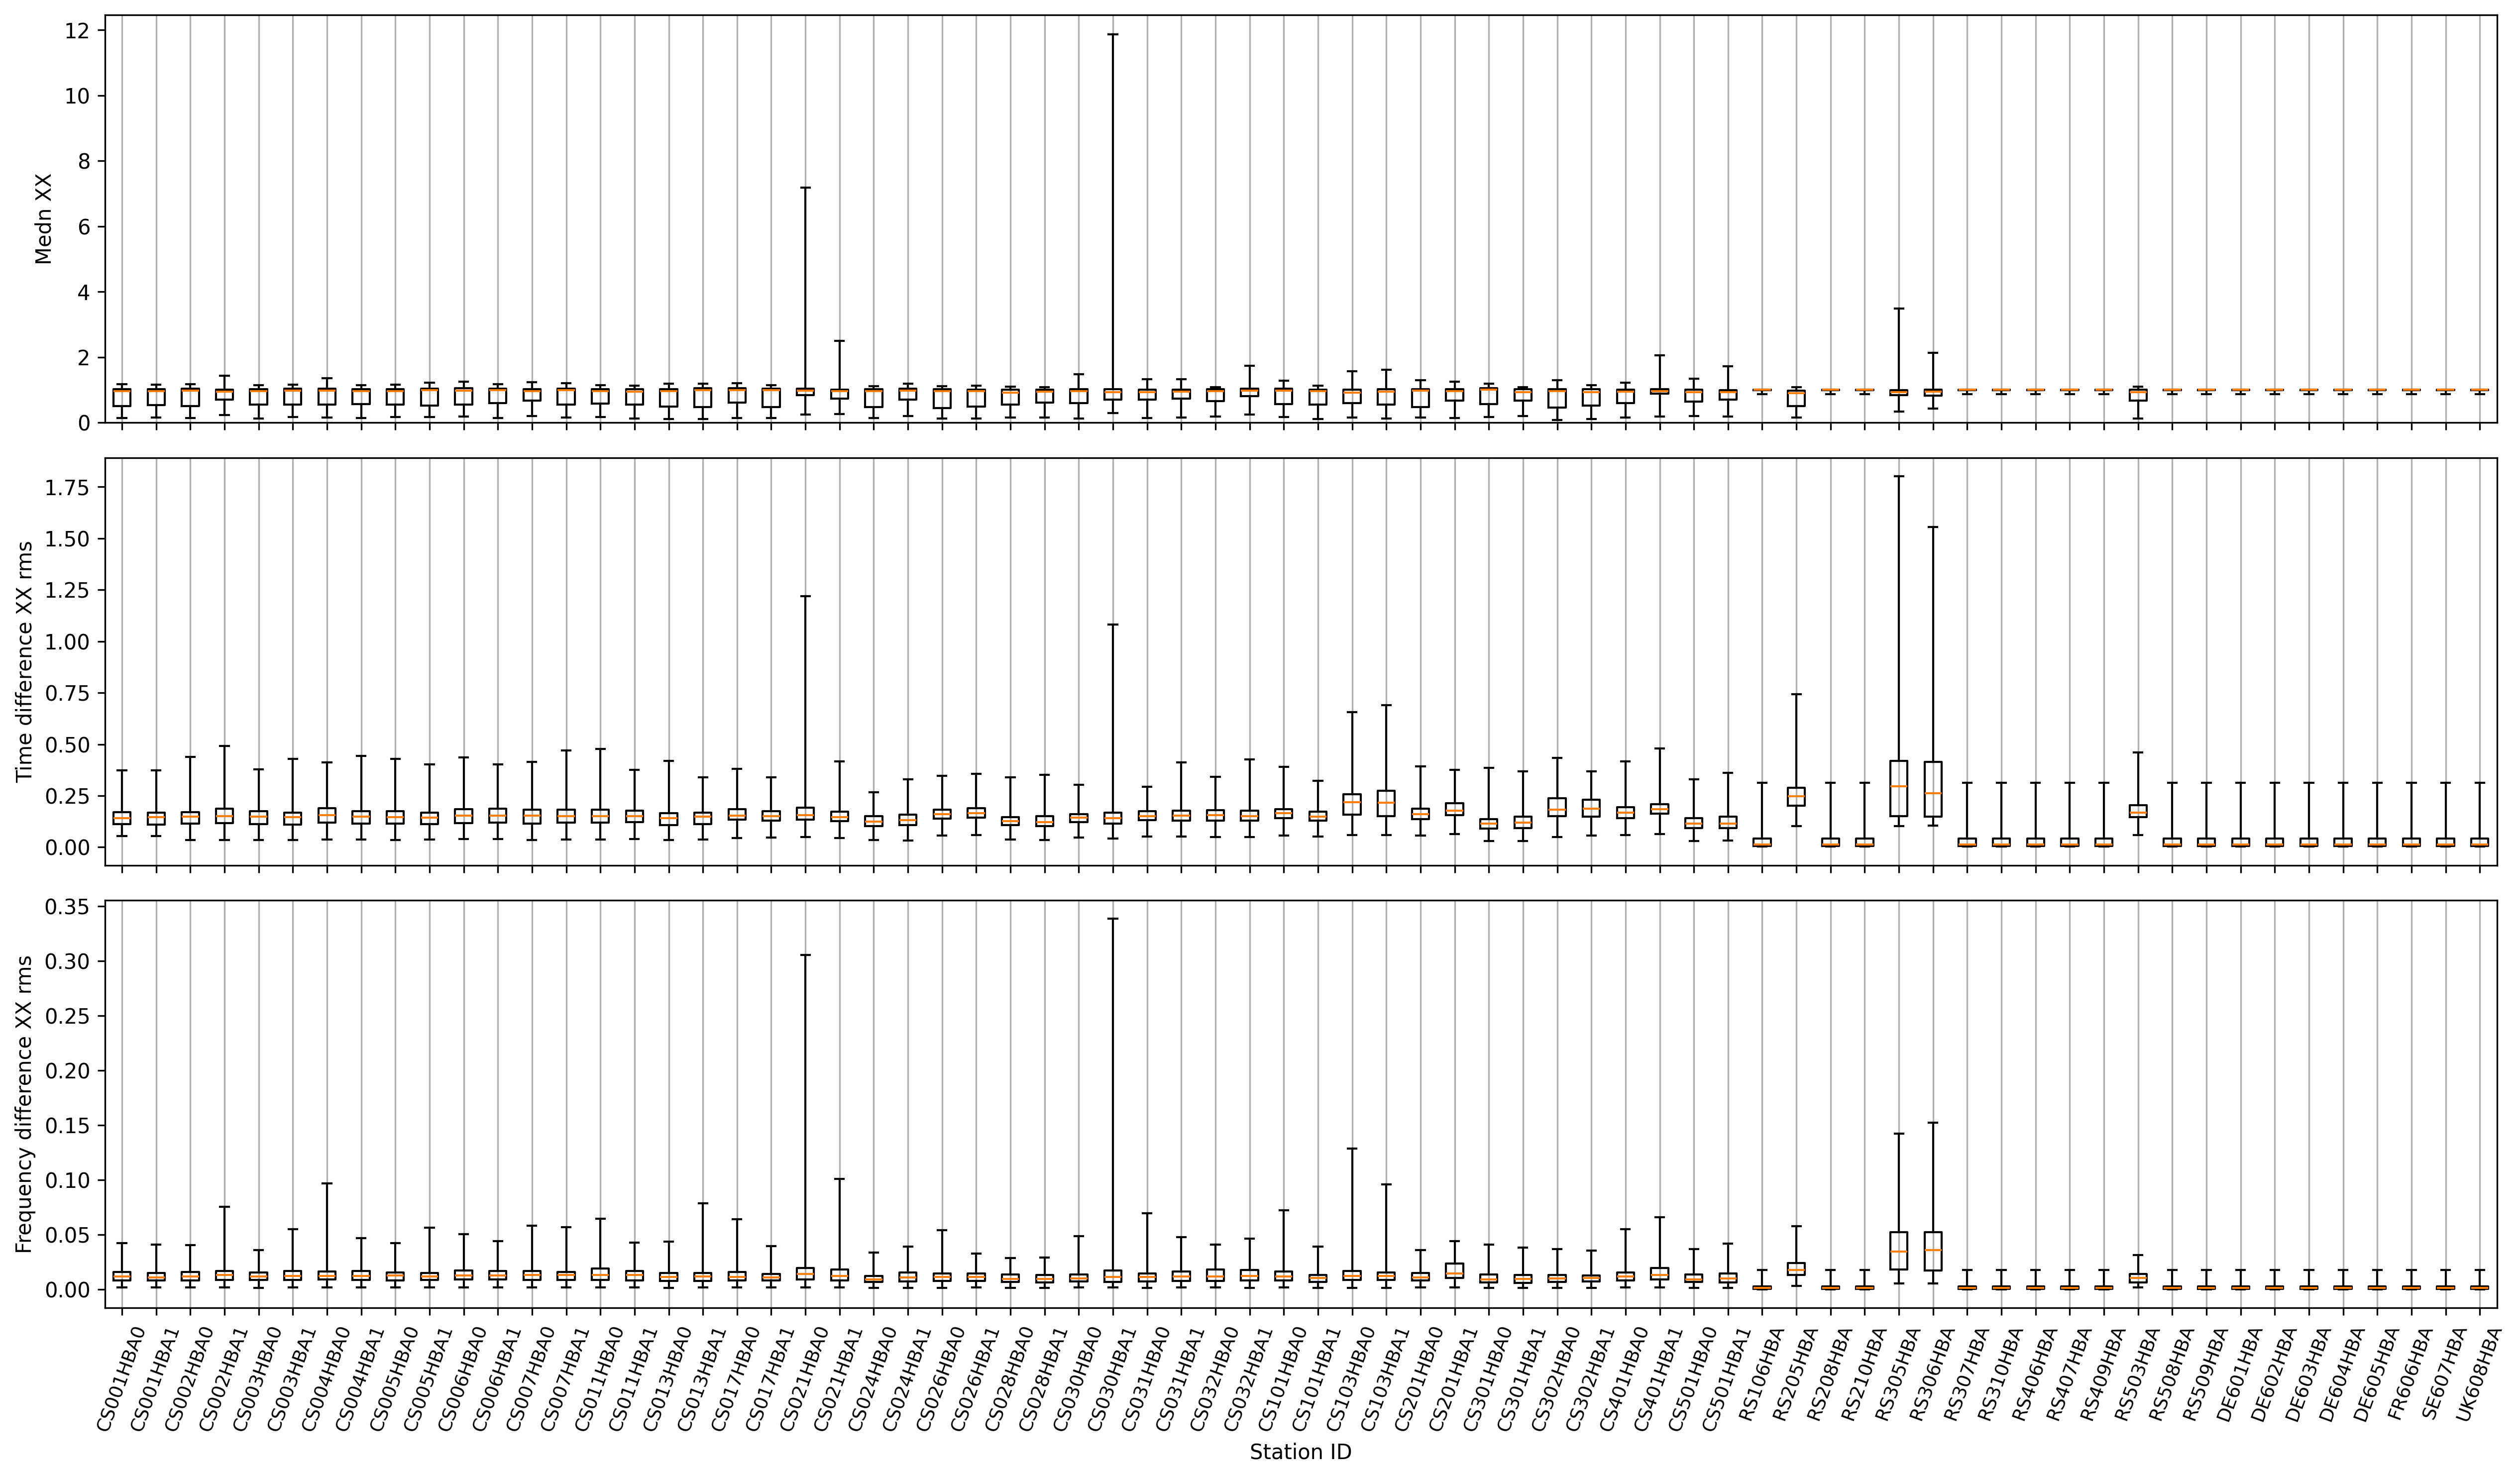

In [12]:
fig = sols.plot.stations_stats(solsdict, pol="XX")

In [13]:
dd_sky_model = "/home/users/chege/theleap/leap/models/sky_sagecal_no_diffuse_simple_ateam_corrected_shape.txt"
cluster_info = sols.get_clusters_details(dd_sky_model)

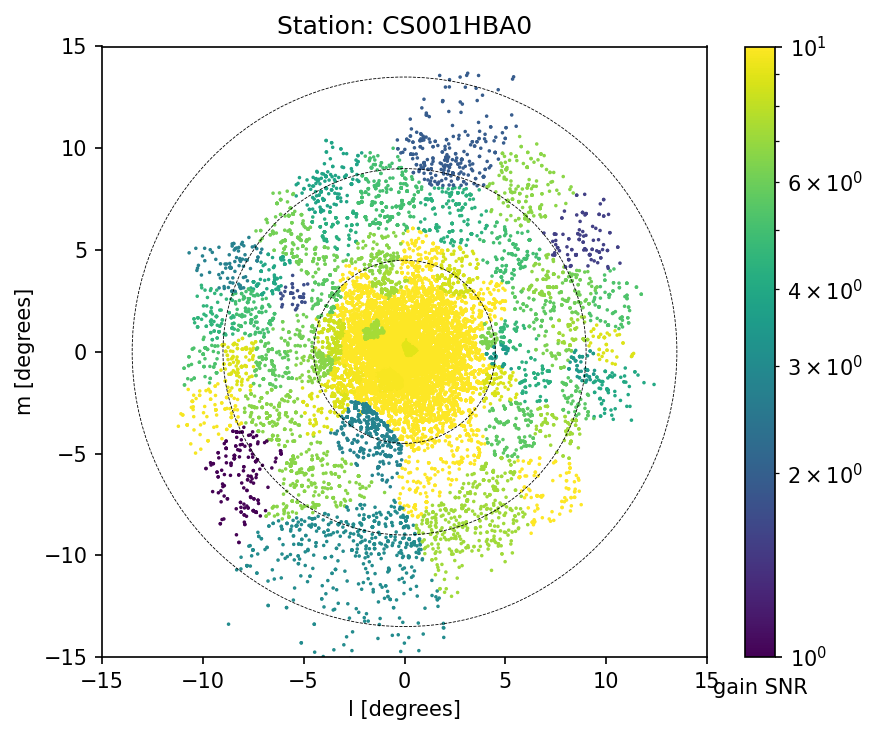

In [14]:
st = sols.stations[0]
fig = sols.plot.cluster_gains_noise(solsdict, clusters_info=cluster_info, station=st, pol='YY')